In [69]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep


driver = webdriver.Chrome("C:\\Users\\sarah\\Downloads\\chromedriver_win32\\chromedriver")

df = pd.DataFrame(columns = ["Title", "Location", "Company", "Salary", "Description"])

titles = []
locations = []
companies = []
salaries = []
descr=[]

for i in range(10, 50, 10):
    driver.get("https://www.indeed.co.in/jobs?q=artificial+intelligence&start="+str(i))
    
    
    sleep(20)
    
    elements = driver.find_elements_by_class_name("result")
    
    for job in elements:
        soup = BeautifulSoup(job.get_attribute("innerHTML"), "html.parser")
        
        
        try:
            title = soup.find("a", class_= "jobtitle").text.replace("\n", "").strip()
            titles.append(title)
        except:
            title = None
            titles.append(title)
            
        try:
            location = soup.find("span", class_="location accessible-contrast-color-location").text.replace("\n","").strip()
            locations.append(location)
        except:
            location = None
            locations.append(location)
        
        try:
            company = soup.find("span", class_="company").text.replace("\n","").strip()
            companies.append(company)
        except:
            company = None
            companies.append(company)
        
        try:
            salary = soup.find( class_="salaryText").text.replace("\n","").strip()
            salaries.append(salary)
        except:
            salary = None
            salaries.append(salary)
        
        
        try:
            dsc = soup.find("div", class_= "summary").text.replace("\n", "").strip()
            descr.append(dsc)
        except:
            dsc = None
            descr.append(dsc)
        
df = pd.DataFrame({
    "Title":titles,
    "Location":locations,
    "Company":companies,
    "Salary":salaries,
    "Description":descr
})

df.to_csv("TrialAI4.csv")

In [80]:
df = pd.read_csv("TrialAI4.csv")
df

,Unnamed: 0,Title,Location,Company,Salary,Description
0,0,Teacher Recruitment & Training,NaN,Whitehat Education Technology Pvt. Ltd.,"₹3,00,000 - ₹4,50,000 a year","In 2030, Artificial Intelligence and Robotics ..."
1,1,RF Test Lab Manager,NaN,Telstra,NaN,Telstra is Australia’s leading telecommunicati...
2,2,IoT Developer,NaN,TensorIoT Software Services Pvt. Ltd.,NaN,We are a consulting company in the IoT (Intern...
3,3,Artificial Intelligence / Machine Learning Eng...,"Kochi, Kerala",Immco Software Solutions Pvt Ltd,NaN,Experience in building ML/AI models to solve b...
4,4,Artificial Intelligence and Machine learning T...,"Badarpur, Delhi",Digital School of Delhi,NaN,Contribute to all phases of the development li...
...,...,...,...,...,...,...
56,56,RF Test Lab Manager,NaN,Telstra,NaN,Telstra is Australia’s leading telecommunicati...
57,57,Technical Support Executive,NaN,Whitehat Education Technology Pvt. Ltd.,"₹2,00,000 - ₹3,00,000 a year",Recruit & train teachers at scale in deliverin...
58,58,Teacher Recruitment & Training,NaN,Whitehat Education Technology Pvt. Ltd.,"₹3,00,000 - ₹4,50,000 a year","In 2030, Artificial Intelligence and Robotics ..."
59,59,Phone Recruiter,NaN,Whitehat Education Technology Pvt. Ltd.,"₹2,00,000 - ₹3,00,000 a year",Recruitment executive (Phone recruitment– HR b...


In [81]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

#for i in range(0, 100,1):
data=[]
def CleanData(descr):
    desc = word_tokenize(str(descr))
    for word in desc:
        lower = word.lower()
        if lower not in stop_words:
            data.append(lower)
    return data

In [82]:
tags_df = CleanData(df["Description"])
tags_df

['0',
 '2030',
 ',',
 'artificial',
 'intelligence',
 'robotics',
 '...',
 '1',
 'telstra',
 'australia',
 '’',
 'leading',
 'telecommunicati',
 '...',
 '2',
 'consulting',
 'company',
 'iot',
 '(',
 'intern',
 '...',
 '3',
 'experience',
 'building',
 'ml/ai',
 'models',
 'solve',
 'b',
 '...',
 '4',
 'contribute',
 'phases',
 'development',
 'li',
 '...',
 '...',
 '56',
 'telstra',
 'australia',
 '’',
 'leading',
 'telecommunicati',
 '...',
 '57',
 'recruit',
 '&',
 'train',
 'teachers',
 'scale',
 'deliverin',
 '...',
 '58',
 '2030',
 ',',
 'artificial',
 'intelligence',
 'robotics',
 '...',
 '59',
 'recruitment',
 'executive',
 '(',
 'phone',
 'recruitment–',
 'hr',
 'b',
 '...',
 '60',
 'artificial',
 'intelligence',
 'technologies',
 'cert',
 '...',
 'name',
 ':',
 'description',
 ',',
 'length',
 ':',
 '61',
 ',',
 'dtype',
 ':',
 'object']

In [83]:
from collections import Counter


l1 = []
occur = []

for i in tags_df:
    n = Counter(tags_df)
    t = (i, n[i])
    l1.append(t)
    
occur = list(dict.fromkeys(l1))
occur


[('0', 1),
 ('2030', 2),
 (',', 4),
 ('artificial', 3),
 ('intelligence', 3),
 ('robotics', 2),
 ('...', 11),
 ('1', 1),
 ('telstra', 2),
 ('australia', 2),
 ('’', 2),
 ('leading', 2),
 ('telecommunicati', 2),
 ('2', 1),
 ('consulting', 1),
 ('company', 1),
 ('iot', 1),
 ('(', 2),
 ('intern', 1),
 ('3', 1),
 ('experience', 1),
 ('building', 1),
 ('ml/ai', 1),
 ('models', 1),
 ('solve', 1),
 ('b', 2),
 ('4', 1),
 ('contribute', 1),
 ('phases', 1),
 ('development', 1),
 ('li', 1),
 ('56', 1),
 ('57', 1),
 ('recruit', 1),
 ('&', 1),
 ('train', 1),
 ('teachers', 1),
 ('scale', 1),
 ('deliverin', 1),
 ('58', 1),
 ('59', 1),
 ('recruitment', 1),
 ('executive', 1),
 ('phone', 1),
 ('recruitment–', 1),
 ('hr', 1),
 ('60', 1),
 ('technologies', 1),
 ('cert', 1),
 ('name', 1),
 (':', 3),
 ('description', 1),
 ('length', 1),
 ('61', 1),
 ('dtype', 1),
 ('object', 1)]

In [84]:
def Convert(tup, di):
    di = dict(tup)
    return di

dc = {}

count = Convert(occur, dc)
print(count)

{'0': 1, '2030': 2, ',': 4, 'artificial': 3, 'intelligence': 3, 'robotics': 2, '...': 11, '1': 1, 'telstra': 2, 'australia': 2, '’': 2, 'leading': 2, 'telecommunicati': 2, '2': 1, 'consulting': 1, 'company': 1, 'iot': 1, '(': 2, 'intern': 1, '3': 1, 'experience': 1, 'building': 1, 'ml/ai': 1, 'models': 1, 'solve': 1, 'b': 2, '4': 1, 'contribute': 1, 'phases': 1, 'development': 1, 'li': 1, '56': 1, '57': 1, 'recruit': 1, '&': 1, 'train': 1, 'teachers': 1, 'scale': 1, 'deliverin': 1, '58': 1, '59': 1, 'recruitment': 1, 'executive': 1, 'phone': 1, 'recruitment–': 1, 'hr': 1, '60': 1, 'technologies': 1, 'cert': 1, 'name': 1, ':': 3, 'description': 1, 'length': 1, '61': 1, 'dtype': 1, 'object': 1}


In [85]:
res = pd.Series({k:v for k,v in occur})
res

0                   1
2030                2
,                   4
artificial          3
intelligence        3
robotics            2
...                11
1                   1
telstra             2
australia           2
’                   2
leading             2
telecommunicati     2
2                   1
consulting          1
company             1
iot                 1
(                   2
intern              1
3                   1
experience          1
building            1
ml/ai               1
models              1
solve               1
b                   2
4                   1
contribute          1
phases              1
development         1
li                  1
56                  1
57                  1
recruit             1
&                   1
train               1
teachers            1
scale               1
deliverin           1
58                  1
59                  1
recruitment         1
executive           1
phone               1
recruitment–        1
hr        

In [90]:
skills = ['robotics', 'iot', 'engineer', 'ml/ai']
filt = res.filter(items = skills)
print(filt)

robotics    2
iot         1
ml/ai       1
dtype: int64


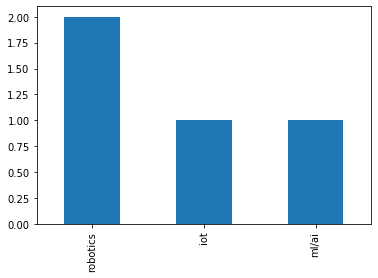

In [91]:
import matplotlib.pyplot as plt
filt.plot(kind='bar')
plt.show()